# **QSAR Model Building of Acetylcholinesterase Inhibitors**

Chanin Nantasenamat

*Data Professor YouTube channel, http://youtube.com/dataprofessor*

# Read in data

In [31]:
import pandas as pd
import numpy as np

In [55]:
dataset_url = 'pkcb_3.csv'
dataset = pd.read_csv(dataset_url)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.619789
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.346787
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.050610
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.136677
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.568636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.327902
694,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.229148
695,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.221849
696,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.000000


In [57]:

X = dataset.drop(['pIC50'], axis=1)

In [58]:
Y = dataset.iloc[:,-1]
Y

0      6.619789
1      4.346787
2      6.050610
3      6.136677
4      6.568636
         ...   
693    8.327902
694    8.229148
695    8.221849
696    6.000000
697    8.221849
Name: pIC50, Length: 698, dtype: float64

# Remove low variance features

In [59]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP15,PubchemFP16,PubchemFP20,PubchemFP21,PubchemFP143,PubchemFP144,PubchemFP145,PubchemFP146,PubchemFP148,PubchemFP149,...,PubchemFP776,PubchemFP777,PubchemFP797,PubchemFP798,PubchemFP800,PubchemFP803,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP868
0,1,1,1,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,1,0,0,1,0,1,1,1,1,...,0,0,1,0,0,0,1,0,0,0
2,1,1,1,0,1,0,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,1,1,1,1,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,1,1,0,0,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
694,1,1,0,0,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
695,1,1,0,0,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
696,1,1,0,0,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0


In [60]:
X.to_csv('pkcb_descriptor_list.csv', index = False)

In [61]:
# In the app, use the following to get this same descriptor list
# of 218 variables from the initial set of 881 variables
# Xlist = list(pd.read_csv('descriptor_list.csv').columns)
# X[Xlist]

# Random Forest Regression Model

In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.8806433917527827

## Model Prediction

In [64]:
Y_pred = model.predict(X)
Y_pred

array([6.36457075, 5.32502889, 5.97912597, 6.08753695, 6.23523098,
       4.63133245, 7.44327746, 7.44327746, 7.57051377, 7.57051377,
       7.0747156 , 7.0747156 , 6.30395723, 6.30395723, 7.8394928 ,
       7.8394928 , 8.2726763 , 8.2726763 , 7.58237061, 7.58237061,
       7.56936472, 7.56936472, 7.8394928 , 7.8394928 , 7.84862767,
       7.84862767, 7.77105436, 7.77105436, 7.32811599, 7.32811599,
       7.46785483, 7.46785483, 7.5272839 , 7.5272839 , 7.8394928 ,
       7.8394928 , 6.9966872 , 6.9966872 , 7.44327746, 7.44327746,
       4.61912511, 4.61912511, 6.48560038, 6.48560038, 7.57051377,
       7.57051377, 6.91820098, 6.91820098, 5.66727725, 6.00841709,
       7.0747156 , 7.0747156 , 7.0747156 , 7.0747156 , 7.37218054,
       7.37218054, 7.44327746, 7.44327746, 6.90226001, 4.14571259,
       4.14571259, 6.85624178, 6.85624178, 7.0747156 , 7.0747156 ,
       7.44327746, 7.44327746, 6.89284549, 6.89284549, 4.79702443,
       4.79702443, 6.89284549, 7.14367969, 7.14367969, 6.85624

## Model Performance

In [65]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.23
Coefficient of determination (R^2): 0.88


# Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [66]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

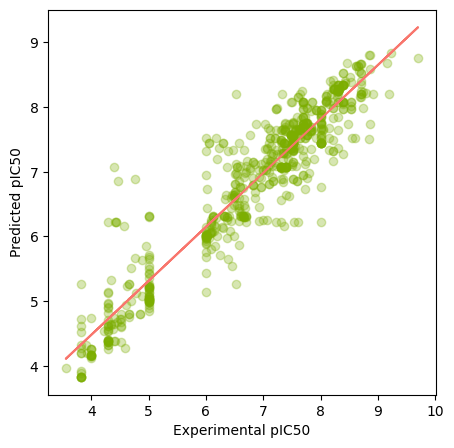

In [67]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

# Save Model as Pickle Object

In [68]:
import pickle

In [69]:
pickle.dump(model, open('proteinkinaseb.pkl', 'wb'))